# Gráfica de respuestas dinámicas

Se generan las graficas de dispersion de los valores maximos y promedio de las respuestas dinamicas obtenidas de la simulación en FAST. Solo nos enfocamos en dos respuestas dinámicas: <br> <br>
-Fuerza de corte en la base del aerogenerador ($F_X$) <br>
-Momento flector en la base del aerogenerador ($M_Y$)

## Importando librerías

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. Importando datos

In [72]:
fx = pd.read_excel(r'..\data\Stats_responses_FX_MY.xlsx', sheet_name = 'Fx')
my = pd.read_excel(r'..\data\Stats_responses_FX_MY.xlsx', sheet_name = 'My')

In [73]:
fx.head()

,Uw,Mean,Std,Max
0,7.0,304.299620,77.711242,568.151348
1,7.0,305.442862,84.471471,515.828768
2,7.0,309.550108,86.337262,551.298156
3,7.0,297.987123,82.988705,518.602504
4,7.0,305.557052,108.315983,590.051710


In [74]:
my.head()

,Uw,Mean,Std,Max
0,7.0,26382.554326,6574.463954,46214.376173
1,7.0,26587.721100,7612.724378,44392.082123
2,7.0,26989.315063,7596.961953,48048.909592
3,7.0,25888.444071,7183.203478,43054.110652
4,7.0,26643.518204,9815.795883,52229.271873


## 2. Grafica de puntos de valores máximos y medios de $F_X$

### a) Variables de control de gráfico

In [75]:
ps_w, ps_h = 15, 7
line_w = 0.5
axFont = 20       #tamaño para el texto del eje
num_axFont = 16   #Tamaño de los números del eje

grid_dash = (8,4)
grid_lw = 0.5

In [76]:
#Copiando el dataframe y pasando de kN a MN
tmp_df = fx[['Uw']].copy()
tmp_df['Mean'] = fx['Mean'] / 1000
tmp_df['Std'] = fx['Std'] / 1000
tmp_df['Max'] = fx['Max'] / 1000

In [77]:
tmp_df

,Uw,Mean,Std,Max
0,7.0,0.304300,0.077711,0.568151
1,7.0,0.305443,0.084471,0.515829
2,7.0,0.309550,0.086337,0.551298
3,7.0,0.297987,0.082989,0.518603
4,7.0,0.305557,0.108316,0.590052
...,...,...,...,...
795,25.0,0.400806,0.099398,0.771170
796,25.0,0.400418,0.096775,0.828181
797,25.0,0.403067,0.105436,0.764477
798,25.0,0.400325,0.107265,0.764785


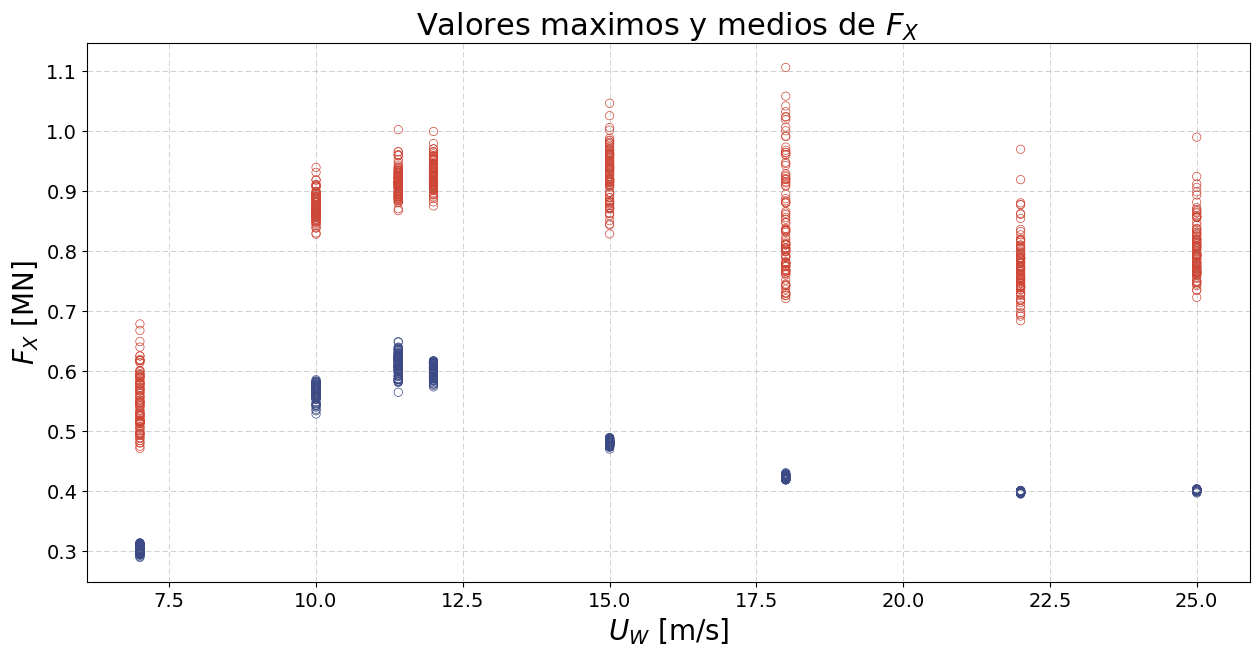

In [78]:
#Creando gráfico
fig, ax = plt.subplots(figsize = (ps_w, ps_h))

ax.scatter(tmp_df['Uw'],tmp_df['Max'],
           edgecolor='#CE4636', facecolor='none', linewidth=line_w)
ax.scatter(tmp_df['Uw'],tmp_df['Mean'],
           edgecolor='#3C4A85', facecolor='none', linewidth=line_w)

ax.set_title('Valores maximos y medios de $F_X$', fontsize = axFont+2)
ax.set_ylabel('$F_X$ [MN]', fontsize = axFont)
ax.set_xlabel('$U_W$ [m/s]', fontsize = axFont)

ax.tick_params(axis = 'both', labelsize = num_axFont-2)

# Agregar grid con líneas discontinuas
ax.grid(color = 'gray', linestyle = '--', linewidth = grid_lw, alpha=0.5, dashes = grid_dash)

### b) Hallando el valor representativo medio de la respuesta $F_X$

In [79]:
fx_mean = fx.groupby('Uw').mean().reset_index()
fx_mean

,Uw,Mean,Std,Max
0,7.0,303.374911,81.325352,550.598505
1,10.0,565.933079,107.139363,875.245939
2,11.4,612.090333,100.863643,915.027049
3,12.0,600.528589,107.542677,928.372199
4,15.0,480.944966,98.924680,927.023426
5,18.0,422.939456,87.448614,850.078946
6,22.0,398.416950,92.860021,775.136926
7,25.0,401.124476,102.719253,805.412344


In [80]:
fx_std = fx.groupby('Uw').std().reset_index()
fx_std

,Uw,Mean,Std,Max
0,7.0,5.468517,11.826621,45.760339
1,10.0,11.547344,12.519938,20.823533
2,11.4,16.565986,7.536241,21.981353
3,12.0,10.644531,4.383829,22.423978
4,15.0,4.011789,7.330311,41.674987
5,18.0,2.343738,4.729485,91.847327
6,22.0,1.122068,3.000027,47.710960
7,25.0,1.173419,2.713924,46.811400


## 3. Grafica de cajas de valores máximos de $F_X$

### 3.1. Obteniendo valores unicos en la columna Uw

In [81]:
uw_labels = tmp_df['Uw'].unique()

### 3.2. Iterando sobre los valores unicos de Uw y agregando los valores maximos de las realziaciones por cada velocidad de viento

In [82]:
max_vals = []
for ulab in uw_labels:
    tmp_vals = tmp_df.loc[tmp_df['Uw'] == ulab]['Max']
    max_vals.append(tmp_vals)

### 3.3. Creando boxplot

#### a) Variables de control de gráfico

In [83]:
ps_w, ps_h = 15, 8
line_w = 0.5
axFont = 20       #tamaño para el texto del eje
num_axFont = 14   #Tamaño de los números del eje

grid_dash = (8,4)
grid_lw = 0.5

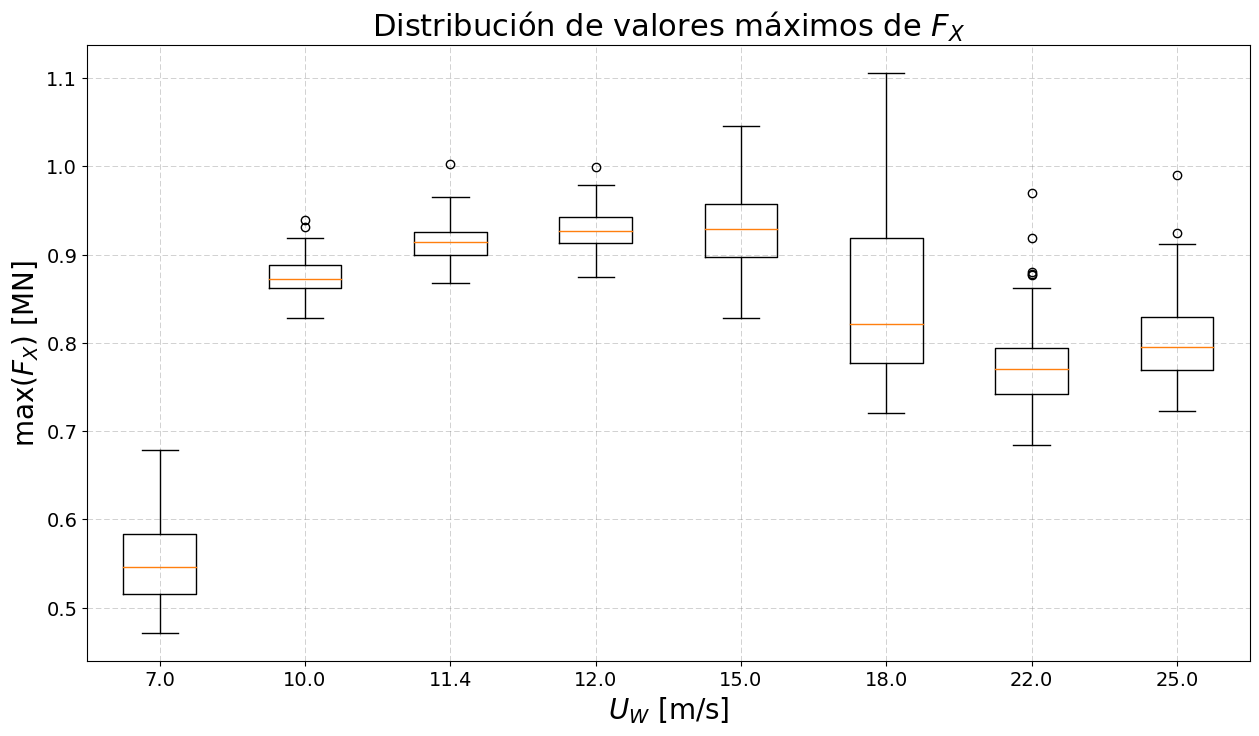

In [84]:
# Creando boxplot
fig = plt.figure(figsize = (ps_w, ps_h))
ax = fig.add_subplot(111)

ax.boxplot(max_vals, positions = range(1, len(uw_labels)+1))
ax.set_xticklabels(uw_labels)

ax.set_xlabel("$U_W$ [m/s]", fontsize = axFont)
ax.set_ylabel("max($F_X$) [MN]", fontsize = axFont)
ax.set_title("Distribución de valores máximos de $F_X$", fontsize = axFont + 2)

ax.tick_params(axis='both', labelsize = num_axFont)

ax.grid(color = 'gray', linestyle = '--', linewidth = grid_lw, alpha=0.5, dashes = grid_dash)

## 4. Grafica de puntos de valores máximos y medios de $M_Y$

### Variables de control de gráfico

In [85]:
ps_w, ps_h = 15, 7
line_w = 0.5
axFont = 20       #tamaño para el texto del eje
num_axFont = 16   #Tamaño de los números del eje

grid_dash = (8,4)
grid_lw = 0.5

In [86]:
#Copiando el dataframe y pasando de kN a MN
tmp_df = my[['Uw']].copy()
tmp_df['Mean'] = my['Mean'] / 1000
tmp_df['Std'] = my['Std'] / 1000
tmp_df['Max'] = my['Max'] / 1000

In [87]:
tmp_df

,Uw,Mean,Std,Max
0,7.0,26.382554,6.574464,46.214376
1,7.0,26.587721,7.612724,44.392082
2,7.0,26.989315,7.596962,48.048910
3,7.0,25.888444,7.183203,43.054111
4,7.0,26.643518,9.815796,52.229272
...,...,...,...,...
795,25.0,31.428340,7.650265,64.650933
796,25.0,31.147736,7.422843,62.021344
797,25.0,31.483795,8.222949,62.357606
798,25.0,31.271379,8.274011,58.856231


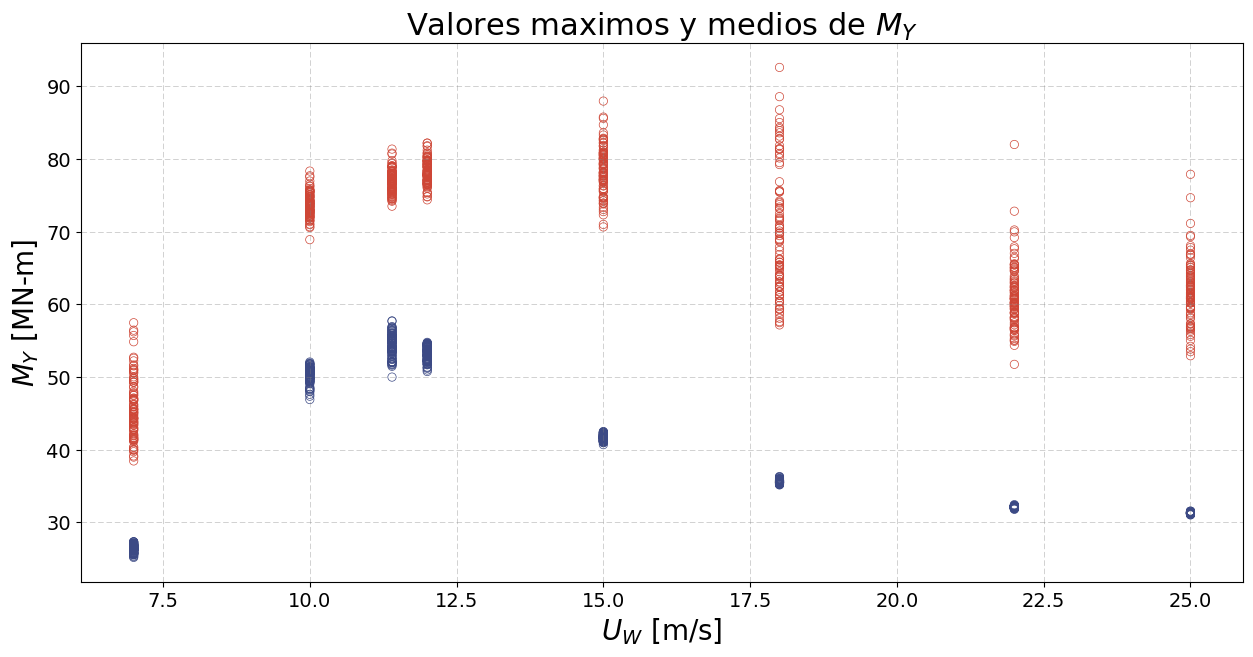

In [88]:
#Creando gráfico
fig, ax = plt.subplots(figsize = (ps_w, ps_h))

ax.scatter(tmp_df['Uw'],tmp_df['Max'],
           edgecolor='#CE4636', facecolor='none', linewidth=line_w)
ax.scatter(tmp_df['Uw'],tmp_df['Mean'],
           edgecolor='#3C4A85', facecolor='none', linewidth=line_w)

ax.set_title('Valores maximos y medios de $M_Y$', fontsize = axFont+2)
ax.set_ylabel('$M_Y$ [MN-m]', fontsize = axFont)
ax.set_xlabel('$U_W$ [m/s]', fontsize = axFont)

ax.tick_params(axis = 'both', labelsize = num_axFont-2)

# Agregar grid con líneas discontinuas
ax.grid(color = 'gray', linestyle = '--', linewidth = grid_lw, alpha=0.5, dashes = grid_dash)

### b) Hallando el valor representativo medio de la respuesta $F_X$

In [89]:
my_mean = my.groupby('Uw').mean().reset_index()
my_mean

,Uw,Mean,Std,Max
0,7.0,26392.363536,7034.669948,45807.231428
1,10.0,50329.203831,9273.480097,73735.281173
2,11.4,54402.381623,8729.163688,77024.046232
3,12.0,53249.484638,9493.898979,78246.163138
4,15.0,41686.374488,8621.210002,78520.210825
5,18.0,35620.721719,7256.475620,69936.039602
6,22.0,32122.516706,7312.761035,61220.662654
7,25.0,31309.633544,7869.367723,61797.181999


In [90]:
my_std = my.groupby('Uw').std().reset_index()
my_std

,Uw,Mean,Std,Max
0,7.0,493.531769,1170.721121,4213.026071
1,10.0,1055.150747,1176.252111,1636.930023
2,11.4,1527.117508,728.345716,1523.093076
3,12.0,980.460641,416.755034,1656.991392
4,15.0,377.754557,729.475274,3245.071016
5,18.0,219.226032,536.571814,8498.625742
6,22.0,111.044316,299.438277,4340.956143
7,25.0,107.183345,277.254134,4182.139745


## 5. Grafica de cajas de valores máximos de $M_Y$

### 5.1. Obteniendo valores unicos en la columna Uw

In [91]:
uw_labels = tmp_df['Uw'].unique()

### 5.2. Iterando sobre los valores unicos de Uw y agregando los valores maximos de las realziaciones por cada velocidad de viento

In [92]:
max_vals = []
for ulab in uw_labels:
    tmp_vals = tmp_df.loc[tmp_df['Uw'] == ulab]['Max']
    max_vals.append(tmp_vals)

### 5.3. Creando boxplot

#### a) Variables de control de gráfico

In [93]:
ps_w, ps_h = 15, 8
line_w = 0.5
axFont = 20       #tamaño para el texto del eje
num_axFont = 14   #Tamaño de los números del eje

grid_dash = (8,4)
grid_lw = 0.5

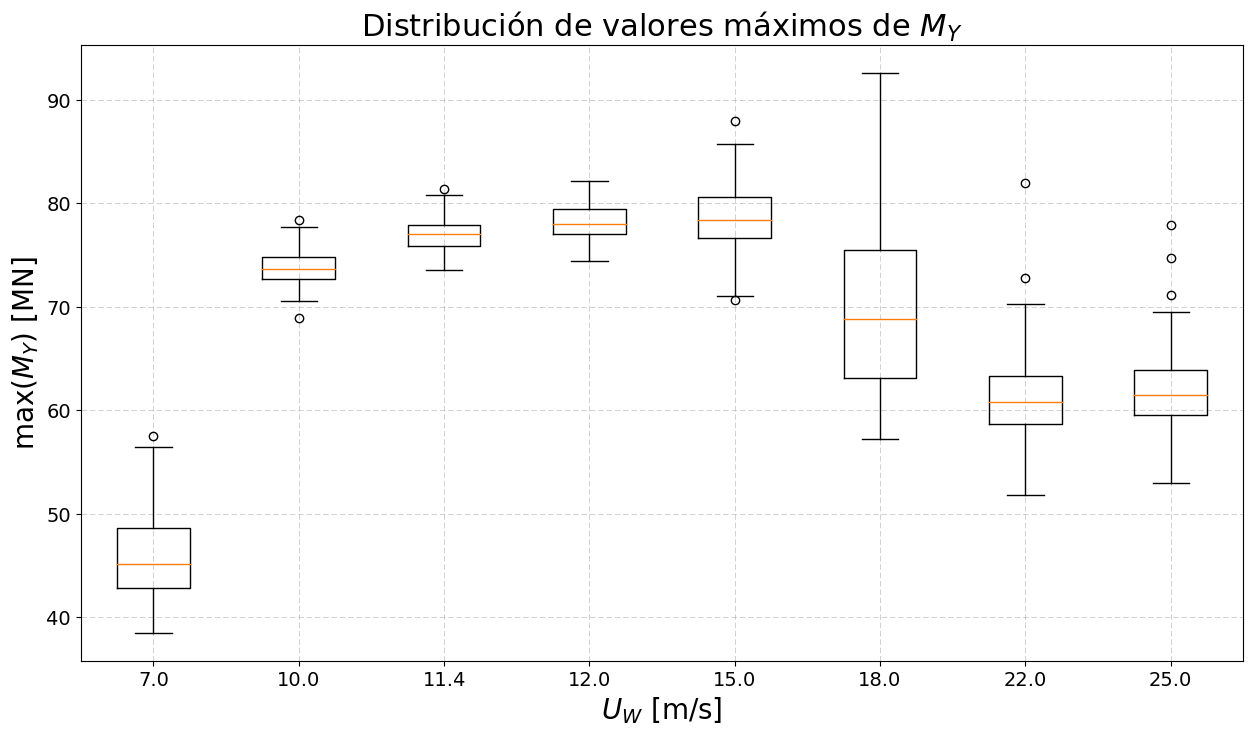

In [94]:
# Creando boxplot
fig = plt.figure(figsize = (ps_w, ps_h))
ax = fig.add_subplot(111)

ax.boxplot(max_vals, positions = range(1, len(uw_labels)+1))
ax.set_xticklabels(uw_labels)

ax.set_xlabel("$U_W$ [m/s]", fontsize = axFont)
ax.set_ylabel("max($M_Y$) [MN]", fontsize = axFont)
ax.set_title("Distribución de valores máximos de $M_Y$", fontsize = axFont + 2)

ax.tick_params(axis='both', labelsize = num_axFont)

ax.grid(color = 'gray', linestyle = '--', linewidth = grid_lw, alpha=0.5, dashes = grid_dash)